# 🐊 error correcting codes

diego domenzain

2.2025

In [1]:
# --------------------------------------------------------------------
#
#                              📚📚📚📚
#
# --------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
# this guy below uncommented makes plots pop out the notebook
# %matplotlib tk

In [2]:
# --------------------------------------------------------------------
# 
#   Hamming code (7,4)
# 
#    ⟶ correct one bit-flip for a word with 4 letters in 𝔽₂. 
# 
#   let P be the points of PG(2,2) that are not boring (🔴) as columns.
# 
# 
#             🟣
#             /|\
#            / | \
#           /  |  \
#         🔴   |   🔴
#         /    |    \
#        /    🔴     \
#       /      |      \
#      /       |       \
#     /        |        \
#   🟣--------🔴---------🟣
# 
# 
#
#  H = [ P | I₃ ]
#      
#      .---. 
#  G = | I₄|
#      |-P |
#      .---.
# 
# 
# let w be the data, a vector of size 4 with entries in 𝔽₂,
# 
#     c = G·w ............. code-word
#         ~~~  some noise  ~~~
#         ~~~ happens here ~~~
#     i = H⋅c ............. i is a vector representing a 
#                           number in binary, 
#                           where the error happened.
#                           (it's really the column whose position
#                           in H is the bit that got corrupted)
#     j = ∑ i[k]·2ᵏ
#  c[j] = c[j] + 1 ........ c gets corrected at position j.
# 
# --------------------------------------------------------------------
H = np.zeros((3,7),dtype=np.intc) # error finder
G = np.zeros((7,4),dtype=np.intc) # generator
# --------------------------------------------------------------------
# this construction makes sense in the math,
# but it's not very elegant when it comes to 
# actually correcting the error.

# H[:,0] = np.asarray([0,1,1])
# H[:,1] = np.asarray([1,0,1])
# H[:,2] = np.asarray([1,1,0])
# H[:,3] = np.asarray([1,1,1])
# H[:,4] = np.asarray([1,0,0])
# H[:,5] = np.asarray([0,1,0])
# H[:,6] = np.asarray([0,0,1])

# G[0,:] = np.asarray([1,0,0,0])
# G[1,:] = np.asarray([0,1,0,0])
# G[2,:] = np.asarray([0,0,1,0])
# G[3,:] = np.asarray([0,0,0,1])
# G[4:7,:] = -H[:,0:4]

# itranslate = np.asarray([ 4, 5, 2, 6, 1, 0, 3])
# itranslatew = np.asarray([0,1,2,3])
# --------------------------------------------------------------------
# this construction looks weird,
# but it's elegant when it comes to 
# actually correcting the error.

H[:,0] = np.asarray([1,1,1])
H[:,1] = np.asarray([0,1,1])
H[:,2] = np.asarray([1,0,1])
H[:,3] = np.asarray([0,0,1])
H[:,4] = np.asarray([1,1,0])
H[:,5] = np.asarray([0,1,0])
H[:,6] = np.asarray([1,0,0])

G[0,:] = np.asarray([0,0,0,1])
G[1,:] = np.asarray([0,0,1,0])
G[2,:] = np.asarray([0,1,0,0])
G[3,:] = np.asarray([0,1,1,1])
G[4,:] = np.asarray([1,0,0,0])
G[5,:] = np.asarray([1,0,1,1])
G[6,:] = np.asarray([1,1,0,1])

itranslate = np.asarray([6,5,4,3,2,1,0])
itranslatew = np.asarray([4,2,1,0])
# --------------------------------------------------------------------
H = np.mod(H,2)
G = np.mod(G,2)
# --------------------------------------------------------------------

In [3]:
# --------------------------------------------------------------------
# data
w = np.zeros((4,),dtype=np.intc)
w = np.asarray([1,0,0,1])
# --------------------------------------------------------------------
# code-word
c = np.dot(G,w)
c = np.mod(c,2)
# --------------------------------------------------------------------
# noise
ierr = 3
cn = np.copy(c)
cn[ierr] = c[ierr] + 1
cn = np.mod(cn,2)
cn_= np.copy(cn)
# --------------------------------------------------------------------
# find noise
pcheck = np.dot(H,cn)
pcheck = np.mod(pcheck,2)

ierr_ = itranslate[pcheck[0]*(2**0) + pcheck[1]*(2**1) + pcheck[2]*(2**2) -1]
# --------------------------------------------------------------------
# recover data
cn_[ierr_] = np.mod(cn_[ierr_] + 1,2)
w_ = cn_[itranslatew]
# --------------------------------------------------------------------
# 🖨️
print(f" data:                {w}")
print(f" encoded data:        {c}")
print(f" encoded noise:       {cn}")
print(f" encoded noise fixed: {cn_}")
print(f" data recovered:      {w_}")
print(f"\n error position:       {ierr}")
print(f" error position found: {ierr_}")
# --------------------------------------------------------------------

 data:                [1 0 0 1]
 encoded data:        [1 0 0 1 1 0 0]
 encoded noise:       [1 0 0 0 1 0 0]
 encoded noise fixed: [1 0 0 1 1 0 0]
 data recovered:      [1 0 0 1]

 error position:       3
 error position found: 3


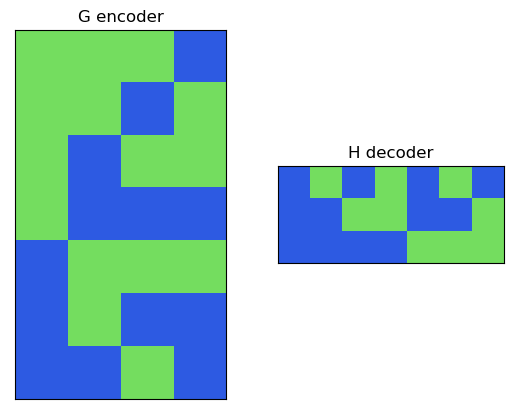

In [4]:
# 🟪🟧🟥🟨⚫

import sys
sys.path.append("../../../../src/python/graphics/")
from coloritobar import coloritobar
colorito = coloritobar()

coloritomapo = colorito.build(0,0.5,1,2,cmap="bi")
# --------------------------------------------------------------------
fig, ax = plt.subplots(1,2)

im=ax[0].imshow(G,cmap=coloritomapo,vmin=0,vmax=1)
ax[0].set_title("G encoder")
ax[0].set_xticks([])
ax[0].set_yticks([])

im=ax[1].imshow(H,cmap=coloritomapo,vmin=0,vmax=1)
ax[1].set_title("H decoder")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()
# --------------------------------------------------------------------

                                     fin